In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('data/user_data.csv')
logs = pd.read_csv('data/logs.csv')

In [10]:
# 1

logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [36]:
# 2

logs \
    .query('success == True') \
        .groupby('client') \
            .agg(count_success=('success', 'count')) \
                .reset_index() \
                    .sort_values(by=['count_success', 'client'], ascending=[False, True]) \
                        .query('count_success == 41') \
                            .client \
                                .to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [37]:
# 3

logs \
    .query('success == True') \
        .platform \
            .value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [41]:
# 4

logs.merge(user_data, on='client') \
    .query('premium == True') \
        .platform \
            .value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

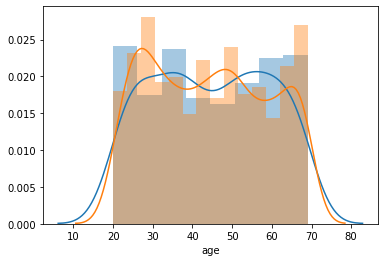

In [47]:
# 5

merge_data = logs.merge(user_data, on='client')

sns.distplot(merge_data[merge_data.premium == True].age)
sns.distplot(merge_data[merge_data.premium == False].age)

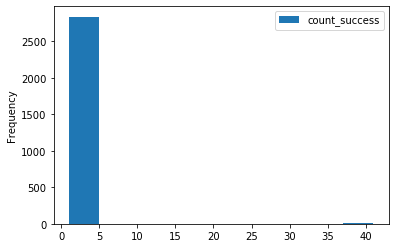

In [53]:
# 6

logs \
    .query('success == True') \
        .groupby('client') \
            .agg(count_success=('success', 'count')) \
                .plot(kind='hist')

In [69]:
# 7

success_comp = merge_data \
    .query('platform == "computer" & success == True')
        
            
success_comp.head()

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25


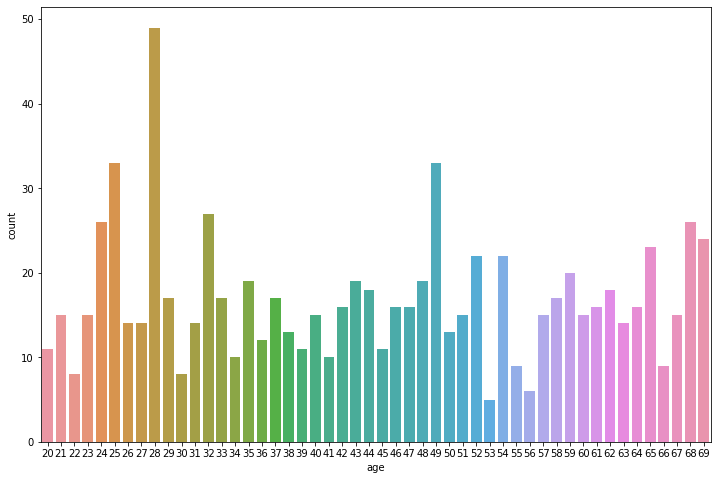

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=success_comp)